# Day 9 - Missingness

## Load Data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer

df = pd.read_csv("/Users/amrithaa/Downloads/12DayDataSeries/notebooks/data/mission_data.csv")

df

,mission_id,mission_type,crew_size,mission_duration_days,distance_to_target_km,fuel_capacity_kg,payload_mass_kg,mental_health_score,solar_flare_risk,mission_cost_millions,anomaly_detected,mission_success_score,mission_outcome
0,MSN_0000,Exploration,9,1173.0,459.67,1188.05,725.61,0.640,0.319,254.79,0,80.82,Success
1,MSN_0001,Resupply,6,1059.0,434.02,1066.20,618.12,NaN,0.235,161.03,0,93.81,Success
2,MSN_0002,Exploration,7,1464.7,596.50,1411.42,810.49,0.767,0.045,261.06,0,91.95,Success
3,MSN_0003,Rescue,9,1833.2,734.71,1895.24,1220.50,0.791,0.199,574.26,0,82.80,Success
4,MSN_0004,Exploration,5,1678.2,680.75,1535.50,927.37,0.874,0.375,290.14,0,87.37,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,MSN_0495,Exploration,8,1188.3,495.98,1073.66,624.35,NaN,0.334,237.26,1,87.76,Success
496,MSN_0496,Exploration,3,1451.9,600.27,1538.68,860.87,0.774,0.378,243.75,0,83.77,Success
497,MSN_0497,Resupply,6,1072.3,422.47,1096.99,651.66,0.835,0.451,144.83,0,86.27,Success
498,MSN_0498,Rescue,4,1408.6,556.01,1445.14,895.37,0.619,0.144,433.87,0,74.36,Success


##  Visualize Missingness

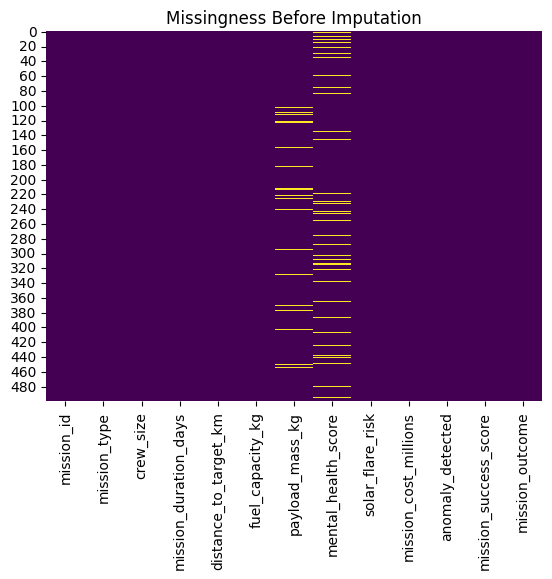

In [28]:
# Visualize the missing values

sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title("Missingness Before Imputation")
plt.show()

## Add Missingness Indicator Variables

In [29]:
missing_cols = df.columns[df.isna().any()].tolist()
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_missing_cols = list(set(missing_cols).intersection(numeric_cols))

for col in numeric_missing_cols:
    df[f"{col}_was_missing"] = df[col].isna().astype(int)


## Impute Missing Values Using k-Nearest Neighbors (kNN)

In [30]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Replace original numeric columns with imputed values
df[numeric_cols] = df_imputed[numeric_cols]

df_imputed

,crew_size,mission_duration_days,distance_to_target_km,fuel_capacity_kg,payload_mass_kg,mental_health_score,solar_flare_risk,mission_cost_millions,anomaly_detected,mission_success_score
0,9.0,1173.0,459.67,1188.05,725.61,0.6400,0.319,254.79,0.0,80.82
1,6.0,1059.0,434.02,1066.20,618.12,0.7634,0.235,161.03,0.0,93.81
2,7.0,1464.7,596.50,1411.42,810.49,0.7670,0.045,261.06,0.0,91.95
3,9.0,1833.2,734.71,1895.24,1220.50,0.7910,0.199,574.26,0.0,82.80
4,5.0,1678.2,680.75,1535.50,927.37,0.8740,0.375,290.14,0.0,87.37
...,...,...,...,...,...,...,...,...,...,...
495,8.0,1188.3,495.98,1073.66,624.35,0.7740,0.334,237.26,1.0,87.76
496,3.0,1451.9,600.27,1538.68,860.87,0.7740,0.378,243.75,0.0,83.77
497,6.0,1072.3,422.47,1096.99,651.66,0.8350,0.451,144.83,0.0,86.27
498,4.0,1408.6,556.01,1445.14,895.37,0.6190,0.144,433.87,0.0,74.36


## Visualize Missingness After Imputation

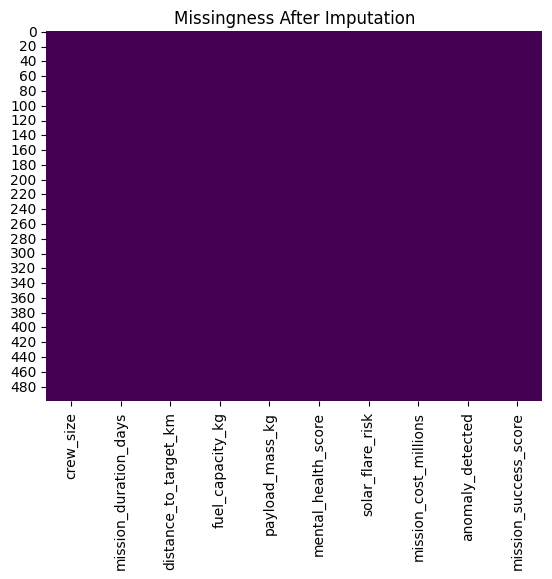

In [31]:
# Visualize the missing values again

sns.heatmap(df_imputed.isna(), cbar=False, cmap='viridis')
plt.title("Missingness After Imputation")
plt.show()

## Final Takeaways
- **Don't just drop rows** — it can bias your data if missingness isn't random.
- **Imputation fills gaps** using averages or models like kNN based on similar rows.
- **Missingness indicators** help your model learn from *why* values were missing.
- **This process prepares your data** for robust inference and better predictions.